# Using Python to Numerically Solve First-Order IVPs
> 5 April 2024: Initial Python Version Created by K. Oliveras

> 15 April 2024: Updated to be modified for use with HW #2 and import data from the file `1D_Logistic_Model_Data_Fitting_Data.csv`


This Python Notebook demonstrates how to numerically solve the initial value problem $$N' = r N\left(1 - \frac{N}{K}\right), \qquad N(0) = N_0$$ using an explicit Runge-Kutta method of order 5(4) (Dormand,Prince).  It also compares with the data.



## Preliminaries/Necessary Libraries
The following block of code loads the appropriate libraries needed to 
 1. use *Matlab-like* arrays `numpy`
 2. use `scipy`'s Runge-Kutta solver
 3. use `matplotlib` to create plots
 4. use `pandas` to import `.csv` data

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Importing & Plotting the Data
The data for this problem is stored in the following format in the file `1D_Logistic_Model_Data_Fitting_Data.csv`.  The columns of the data are structured as follows: 
|year|cases|
|:----:|----:|
|1981|    485|
|1982|    142|
|1983|   1084|
|$\vdots$|$\vdots$|



Using the Pandas library, we will import the data that is saved in a `.csv` file as follows

In [8]:
data = pd.read_csv('1D_Logistic_Model_Data_Fitting_Data.csv')

We can access the various colummns of data as follows.  To return an array of the data in the *years* column, simply type `data.year`.  Likewise, `data.cases` returns an array of the data contained in the *Cases* column in the `.csv` file.

In addition to reading the data, we can also plot the data using `matplotlib` as follows:

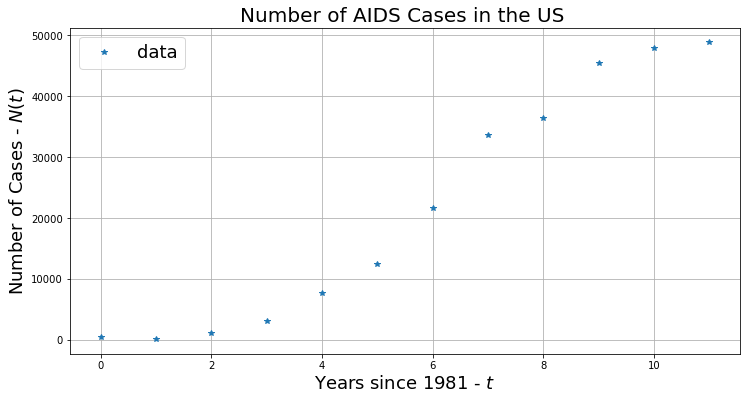

In [23]:

# Create the figure of a certain specified dimension.
plt.figure(figsize=(12,6));

# Plot the data with "*" symbols and label it in the legend as "data"
plt.plot(data.year - 1981, data.cases, '*', label='data');
    
# Label the axes and provide a title
plt.xlabel(r'Years since 1981 - $t$',fontsize=18)
plt.ylabel(r'Number of Cases - $N(t)$',fontsize=18);
plt.title(r'Number of AIDS Cases in the US ', fontsize=20)

# Display the legend and grid.  Then show the figure
plt.legend(fontsize=18)
plt.grid()
plt.show()

## Setting up and Solving the ODE Numerically
For all of our numerical methods to solve a differential equation of the form $\dot{N} = r N \left(1 - \frac{N}{K}\right)$ with $N(t_0) = N_0$, there are several ingredients that we need to provide

1. The initial conditions $t_0$ and $N_0$ 
2. The final time when we would like to compute the solution $t_f$ 
3. The number of steps we would like to take `numSteps` thus defining $\Delta t$ 
4. The $f(N) = r N \left(1 - \frac{N}{K}\right)$ corresponding to the differential equation we would like to solve.   

The following block of code declares the parameters and defines the function `ODEFun` that takes the input `t` (our independent variable) and `N` (our dependent variable).

In [25]:
t0 = 0;
tf = 11;

iniCond = [data.cases[1]]           # iniCond = same initial value from the data
numSteps = 100;
t = np.linspace(t0, tf, numSteps);  # store equally spaced t values for evaluation later on.

# Define the parameter values for the ODE
r = 0.8378367715
K = 49293

def ODEFun(t,N):                    # defining the function f(t,N)
    return r*N*(1-N/K)

Now that we have defined the variables, we can use `SciPy`'s `solve_ivp` command to numerically solve the ODE.  The documentation can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html




In [29]:
sol = solve_ivp(ODEFun, [t0, tf], iniCond, t_eval = t);
print("The solution evaluated at the specified t-values is:")
print(sol.y)

The solution evaluated at the specified t-values is:
[[  142.           155.81028141   170.96149478   187.57982246
    205.80313459   225.78584512   247.69891183   271.72983631
    298.08266401   326.97798418   358.6529299    393.36981972
    431.41926755   473.09979475   518.74746679   568.73715387
    623.482531     683.43607789   749.08907905   820.97162373
    899.65260593   985.73972442  1079.87948273  1182.75718913
   1295.07755748  1417.62759482  1551.36652751  1697.31297732
   1856.54038272  2030.17699896  2219.40589801  2425.46496861
   2649.64691624  2893.29926311  3157.82434819  3444.67932719
   3755.37617257  4091.48167354  4454.58636287  4845.34783793
   5265.6887856   5718.05418269  6204.59350572  6727.16073097
   7287.3143344   7886.31729175  8525.13707845  9204.44566968
   9924.61954034 10685.73966507 11487.59151823 12329.66507391
  13211.15480593 14130.95968784 15087.87105464 16081.94173083
  17109.81522348 18167.1731139  19249.69259703 20353.04648146
  21472.90318941 

## Plotting the solution

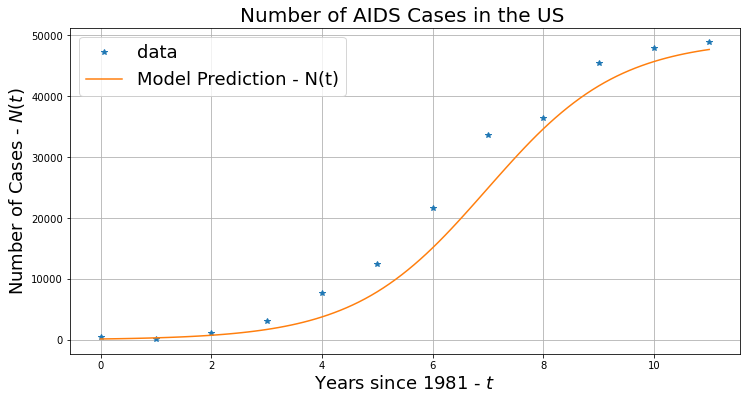

In [27]:
# Create the figure of a certain specified dimension.
plt.figure(figsize=(12,6));

# Plot the data with "*" symbols and label it in the legend as "data"
plt.plot(data.year - 1981, data.cases, '*', label='data');
plt.plot(sol.t,sol.y[0,:],label='Model Prediction - N(t)');

# Label the axes and provide a title
plt.xlabel(r'Years since 1981 - $t$',fontsize=18)
plt.ylabel(r'Number of Cases - $N(t)$',fontsize=18);
plt.title(r'Number of AIDS Cases in the US ', fontsize=20)

# Display the legend and grid.  Then show the figure
plt.legend(fontsize=18)
plt.grid()
plt.show()

## Evaluating the Error

Now, let's take a look at the absolute error in the model by evaluating the solution at certain times - specifically the times where the data is available.  

C:\Users\oliveras\AppData\Local\Temp\ipykernel_10648\2800799894.py:6: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(sol_LowRes.t,np.abs(data.cases - sol_LowRes.y[0,:]),'.',label=r'Absolute Error $\vert N(t) - N_j\vert$');


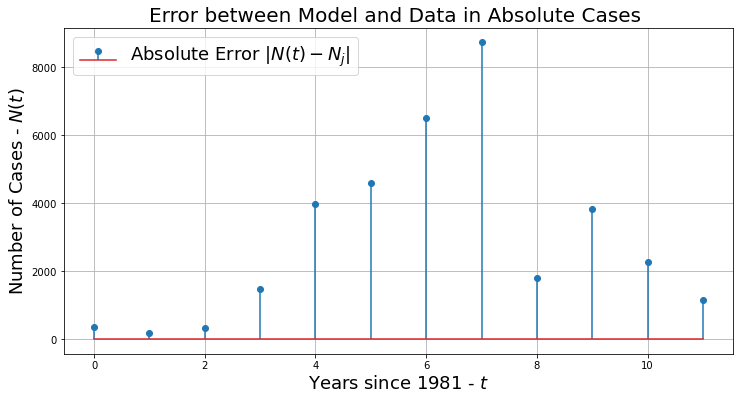

In [41]:
sol_LowRes = solve_ivp(ODEFun, [t0, tf], iniCond, t_eval = np.linspace(0,11,12));
# Create the figure of a certain specified dimension.
plt.figure(figsize=(12,6));

# Plot the data with "*" symbols and label it in the legend as "data"
plt.stem(sol_LowRes.t,np.abs(data.cases - sol_LowRes.y[0,:]),'.',label=r'Absolute Error $\vert N(t) - N_j\vert$');

# Label the axes and provide a title
plt.xlabel(r'Years since 1981 - $t$',fontsize=18)
plt.ylabel(r'Number of Cases - $N(t)$',fontsize=18);
plt.title(r'Error between Model and Data in Absolute Cases ', fontsize=20)

# Display the legend and grid.  Then show the figure
plt.legend(fontsize=18)
plt.grid()
plt.show()

